This notebook explores a list of words that have been written together. We are interested in exploring the dataset and finding out which words tend to occur together. We will explore the concepts of lift, support and confidence. 

## Setup

In [2]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=045bdb5829c9e3e122fc9211eb91e2a1ff4d3f950fb87ebe4298695fe8fc3ccf
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [3]:
import csv
from apyori import apriori
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data

In [4]:
with open('/content/drive/MyDrive/data_sets/sns_baskets.csv', newline='') as f:
    reader = csv.reader(f)
    sns_baskets = list(reader)



This file is essentially a list of lists. Each list is a set of word(s). What we are interested in here is words that co-occur. A co-occurance is when two words (or sets of words) are in the same list. For example we may find that puzzle often co-occurs with piece. This co-occurance can be quantified with the lift, confidence and support. 

Let's explore the basics of the dataset. While this dataset may not seem particularly interesting for mining, consider other use cases such as shopping carts (which we will be using for the assignment). Finding items that co-occur could be immensely valuable for a store to market together. 

In [5]:
sns_baskets[0] # just the first entry, which happens to be one word. not very useful. 

['dance']

Now explore a couple of entries

In [19]:
sns_baskets[12:19]


[['rock', 'god'],
 ['soccer', 'sports', 'music'],
 ['basketball', 'football', 'sports', 'church'],
 ['cheerleading',
  'music',
  'god',
  'mall',
  'shopping',
  'hollister',
  'abercrombie'],
 ['cute', 'rock', 'hollister', 'abercrombie'],
 ['abercrombie'],
 ['basketball', 'soccer']]

Check your understanding of co-occurence. Can you tell which words have co-occurred in these lists?

football and music are the only two words that have co-occured

for the sake of simplicity let's assume this is our whole list of words. let's run the apriori algoritm on it and see if it agrees with what we have seen so far. We will set all our params to 0 to allow the apriori algorithm to discover all possible items. After this we will begin pruning back to be more select

In [32]:
test_list = [
 ['apples','oranges'],
 ['oranges','apples'],
 ['oranges','grapes'],
 ['grapes'],
 ['cherries']

]

In [33]:
association_rules = apriori(test_list, min_support=0.001, min_confidence=0, min_lift=0)
association_results = list(association_rules)

association_results

[RelationRecord(items=frozenset({'apples'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'apples'}), confidence=0.4, lift=1.0)]),
 RelationRecord(items=frozenset({'cherries'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'cherries'}), confidence=0.2, lift=1.0)]),
 RelationRecord(items=frozenset({'grapes'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'grapes'}), confidence=0.4, lift=1.0)]),
 RelationRecord(items=frozenset({'oranges'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'oranges'}), confidence=0.6, lift=1.0)]),
 RelationRecord(items=frozenset({'oranges', 'apples'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'oranges', 'apples'}), confidence=0.4, lift=1.0), OrderedStatistic(items_base=frozenset({'apples'}), items_add=frozense

Check your math here! Do your numbers match the confidence, lift and support found here?

Now let's get a bit more stringent, we don't want EVERY combination. We'd like to find combinations that have a strong relationship. So let's start using the algortithm to filter out the less interesting cases. We Will start with updating only the min_confidence. 

In [34]:
association_rules = apriori(test_list, min_support=0.001, min_confidence=0.6, min_lift=0)
association_results = list(association_rules)

association_results

[RelationRecord(items=frozenset({'oranges'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'oranges'}), confidence=0.6, lift=1.0)]),
 RelationRecord(items=frozenset({'oranges', 'apples'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset({'apples'}), items_add=frozenset({'oranges'}), confidence=1.0, lift=1.6666666666666667), OrderedStatistic(items_base=frozenset({'oranges'}), items_add=frozenset({'apples'}), confidence=0.6666666666666667, lift=1.6666666666666667)])]

So now we've filtered a bit, we've removed the itemset that has oranges and grapes co-occuring as it happened less than oranges and apples. 

Now let's use lift to find items that are not independent of each other (meaning the presence of one makes the presence of the other more likely)

In [37]:
association_rules = apriori(test_list, min_support=0.001, min_confidence=0.6, min_lift=1.01) 
association_results = list(association_rules)

association_results

[RelationRecord(items=frozenset({'oranges', 'apples'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset({'apples'}), items_add=frozenset({'oranges'}), confidence=1.0, lift=1.6666666666666667), OrderedStatistic(items_base=frozenset({'oranges'}), items_add=frozenset({'apples'}), confidence=0.6666666666666667, lift=1.6666666666666667)])]

Does this match with what you expected? Would you agree that oranges and apples seem to co-occur more than the other items, and that it is somewhat unlikely that this is by chance?

# The bigger dataset

In [38]:
len(sns_baskets)

27527

## Apriori

For now let's explore a smaller version of our large dataset

In [120]:
flattened_list = [item for sublist in sns_baskets for item in sublist]
flattened_list[0:20]

['dance',
 'football',
 'cute',
 'music',
 'rock',
 'god',
 'hair',
 'dress',
 'mall',
 'football',
 'band',
 'music',
 'death',
 'cute',
 'rock',
 'sex',
 'kissed',
 'dance',
 'band',
 'music']

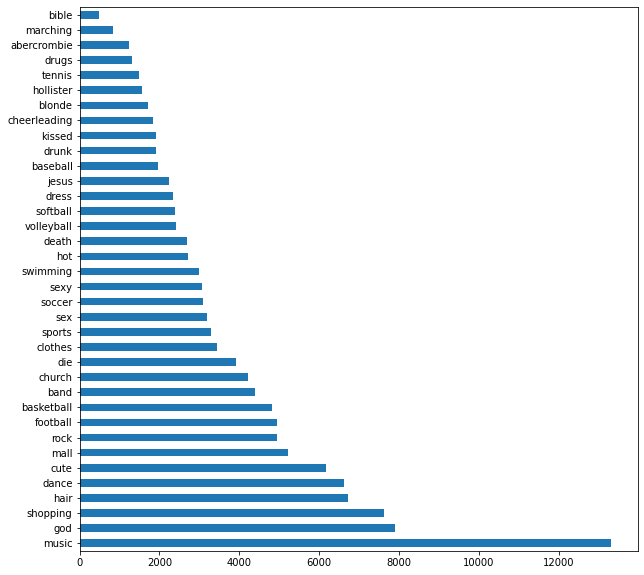

In [121]:
pd.get_dummies(flattened_list).sum().sort_values(ascending=False).plot(kind='barh',figsize=(10,10))

Increase the support threshold so we don't find a ton of weak associations

In [46]:
association_rules = apriori(sns_baskets[0:100], min_support=0.35, min_confidence=0.6, min_lift=1.01) 
association_results = list(association_rules)

association_results

[RelationRecord(items=frozenset({'music', 'god'}), support=0.18, ordered_statistics=[OrderedStatistic(items_base=frozenset({'god'}), items_add=frozenset({'music'}), confidence=0.6923076923076923, lift=1.331360946745562)]),
 RelationRecord(items=frozenset({'music', 'shopping'}), support=0.19, ordered_statistics=[OrderedStatistic(items_base=frozenset({'shopping'}), items_add=frozenset({'music'}), confidence=0.6551724137931035, lift=1.259946949602122)])]

What happens if we relax our support requirements a bit?
Are you starting to see one word that seems to trend here? Music?

In [55]:
association_rules = apriori(sns_baskets[0:100], min_support=0.08, min_confidence=0.6, min_lift=1.01) 
association_results = list(association_rules)

association_results

[RelationRecord(items=frozenset({'music', 'dress'}), support=0.11, ordered_statistics=[OrderedStatistic(items_base=frozenset({'dress'}), items_add=frozenset({'music'}), confidence=0.7857142857142857, lift=1.510989010989011)]),
 RelationRecord(items=frozenset({'music', 'god'}), support=0.18, ordered_statistics=[OrderedStatistic(items_base=frozenset({'god'}), items_add=frozenset({'music'}), confidence=0.6923076923076923, lift=1.331360946745562)]),
 RelationRecord(items=frozenset({'music', 'hair'}), support=0.11, ordered_statistics=[OrderedStatistic(items_base=frozenset({'hair'}), items_add=frozenset({'music'}), confidence=0.7333333333333334, lift=1.4102564102564104)]),
 RelationRecord(items=frozenset({'hair', 'shopping'}), support=0.09, ordered_statistics=[OrderedStatistic(items_base=frozenset({'hair'}), items_add=frozenset({'shopping'}), confidence=0.6, lift=2.0689655172413794)]),
 RelationRecord(items=frozenset({'rock', 'music'}), support=0.14, ordered_statistics=[OrderedStatistic(item

Ok let's run on the whole dataset now. Tighten up the requirements so we don't get too many results. Notice though, tightening up support actually means lowering it because we have so many more entries. Support will drop as the list increases

In [122]:
association_rules = apriori(sns_baskets, min_support=0.04, min_confidence=0.6, min_lift=1.41) 
association_results = list(association_rules)

association_results

[RelationRecord(items=frozenset({'hair', 'kissed'}), support=0.04471972971991136, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kissed'}), items_add=frozenset({'hair'}), confidence=0.6472134595162987, lift=2.645655613321229)]),
 RelationRecord(items=frozenset({'rock', 'music', 'god'}), support=0.04214044392778, ordered_statistics=[OrderedStatistic(items_base=frozenset({'rock', 'god'}), items_add=frozenset({'music'}), confidence=0.6921241050119332, lift=1.4313049536972042)]),
 RelationRecord(items=frozenset({'music', 'rock', 'hair'}), support=0.043302938932684276, ordered_statistics=[OrderedStatistic(items_base=frozenset({'rock', 'hair'}), items_add=frozenset({'music'}), confidence=0.724179829890644, lift=1.497595836330836)])]

Notice that the highest lift found using this criteria is "hair" and "kissed"

In [129]:
def parse_results(rules):
  for item in association_results:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("-------------")

In [130]:
parse_results(association_results)

Rule: hair -> kissed
Support: 0.04471972971991136
Confidence: 0.6472134595162987
Lift: 2.645655613321229
-------------
Rule: rock -> music
Support: 0.04214044392778
Confidence: 0.6921241050119332
Lift: 1.4313049536972042
-------------
Rule: music -> rock
Support: 0.043302938932684276
Confidence: 0.724179829890644
Lift: 1.497595836330836
-------------


now return a slightly relaxed list, but enforce that we only want word pairs (max_length=2)

let's look at high lift items by setting min_lift to 2.01

also let's relax the support so we can find interesting items that appear less frequently.

In [137]:
association_rules = apriori(sns_baskets, min_support=0.0004, min_confidence=0.26, min_lift=2.01,max_length=2) 
association_results = list(association_rules)

association_results

[RelationRecord(items=frozenset({'abercrombie', 'clothes'}), support=0.011879245831365568, ordered_statistics=[OrderedStatistic(items_base=frozenset({'abercrombie'}), items_add=frozenset({'clothes'}), confidence=0.26542207792207795, lift=2.12948806148675)]),
 RelationRecord(items=frozenset({'hollister', 'abercrombie'}), support=0.02601082573473317, ordered_statistics=[OrderedStatistic(items_base=frozenset({'abercrombie'}), items_add=frozenset({'hollister'}), confidence=0.5811688311688312, lift=10.2353387175844), OrderedStatistic(items_base=frozenset({'hollister'}), items_add=frozenset({'abercrombie'}), confidence=0.4580934101087652, lift=10.2353387175844)]),
 RelationRecord(items=frozenset({'band', 'kissed'}), support=0.02230537290660079, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kissed'}), items_add=frozenset({'band'}), confidence=0.3228180862250263, lift=2.0177596411254086)]),
 RelationRecord(items=frozenset({'marching', 'band'}), support=0.02866276746467105, ordere

The algorithm has now identified that marching and band frequently appear together, and that bible and god both appear together regularly. 

This is starting to get into natural language processing territory, we might be interested in knowing what people though of a movie ie positive or negative. while outside the scope of this course that is absolultely something that can be done with data mining algortihms. 

In [5]:
!cp "/content/drive/My Drive/Colab Notebooks/apriori_tutorial.ipynb" ./

# run the second shell command, jupyter nbconvert --to html "file name of the notebook"
# create html from ipynb

!jupyter nbconvert --to html "apriori_tutorial.ipynb"

cp: cannot stat '/content/drive/My Drive/Colab Notebooks/apriori_tutorial.ipynb': No such file or directory
[NbConvertApp] WARNING | pattern u'apriori_tutorial.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a sin